# Import libraries

In [2]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace


NameError: name 'warnings' is not defined

## Load Haar Cascade Model

In [2]:
# Load the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Check if the cascade file was loaded correctly
if face_cascade.empty():
    print("Error loading Haar cascade file.")
else:
    print("Haar cascade loaded successfully.")


Haar cascade loaded successfully.


## Load Video File

In [3]:
# Set up the video capture with a local video file
video_path = r"C:\Users\Zee\Desktop\Human Counting and Ethnicity Detection\video_6.mp4"  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

# Check if video file opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    print("Video loaded successfully.")


Video loaded successfully.


## Process Each Frame from Video

In [4]:
# Read a frame from the video
ret, frame = cap.read()

if ret:
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    print(f"Number of faces detected: {len(faces)}")
else:
    print("Error reading frame or end of video.")


Number of faces detected: 0


## Analyze Detected Faces Using DeepFace

In [5]:
# Process detected faces
for (x, y, w, h) in faces:
    face_image = frame[y:y+h, x:x+w]

    # Analyze ethnicity using DeepFace
    result = DeepFace.analyze(face_image, actions=['race'], enforce_detection=False)

    # Extract ethnicity probabilities and dominant ethnicity
    ethnicity_probs = result[0]['race']
    dominant_ethnicity = max(ethnicity_probs, key=ethnicity_probs.get)

    print(f"Detected Ethnicity: {dominant_ethnicity}")


## Draw Bounding Box and Label on Frame

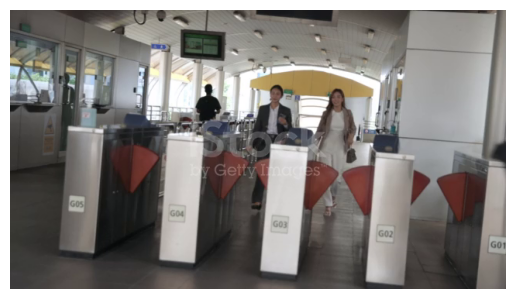

In [6]:
# Draw rectangle and label for each detected face
for (x, y, w, h) in faces:
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(frame, dominant_ethnicity, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show the frame with bounding boxes
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


## Process Video in Loop (Run the Entire Video)

In [7]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("End of video or error in reading.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        face_image = frame[y:y+h, x:x+w]
        result = DeepFace.analyze(face_image, actions=['race'], enforce_detection=False)
        ethnicity_probs = result[0]['race']
        dominant_ethnicity = max(ethnicity_probs, key=ethnicity_probs.get)

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, dominant_ethnicity, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    cv2.imshow('Video', frame)

    # Press 'Escape' key to exit
    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


## Clean Up Resources

In [8]:
# Release video capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()
print("Resources released successfully.")


Resources released successfully.
